In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv")

In [3]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(57394, 49)

In [5]:
data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [7]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
pd.set_option("display.max_columns", None)

In [9]:
data.describe().round(2)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,53758.00,56465.00,55652.00,44368.00,56465.00,55652.00,53471.00,56401.00,55587.00,44096.00,56401.00,55587.00,37696.00,4490.00,4490.00,5005.00,5005.00,357.00,357.00,645.00,645.00,2.201700e+04,21787.00,22017.00,21787.00,24612.00,24612.00,22802.00,23211.00,47847.00,5.707100e+04,54371.00,51034.00,50265.00,50768.00,50367.00,33571.00,51013.00,52881.00,39669.00,39156.00,24176.00,45936.00,56336.00,49247.00
mean,167797.37,1953.58,1920.43,6858.64,47.05,46.84,3139.10,39.34,38.40,95.34,0.68,0.67,1.04,726.19,13.26,3867.25,76.56,249.26,7.28,2230.69,60.66,2.309838e+06,28478.32,78.92,0.92,27389.71,0.90,182.92,0.07,56.98,8.559938e+07,360.49,31.19,9.18,5.80,20620.17,12.44,252.65,8.07,10.74,32.64,52.09,3.09,73.94,0.72
std,1693037.55,18269.65,17777.39,55780.81,390.85,378.27,6183.46,133.99,101.65,180.72,3.03,1.97,0.40,2031.11,18.79,9952.99,109.08,545.01,18.18,5305.47,174.85,1.053218e+07,114909.37,157.73,1.70,105980.94,1.57,877.85,0.09,25.85,6.017270e+08,1639.74,9.04,6.30,4.30,20311.00,19.43,117.52,4.19,10.47,13.45,31.65,2.51,7.40,0.15
min,1.00,-8261.00,-552.00,1.00,-1918.00,-232.14,0.00,-2212.54,-269.98,0.00,-67.90,-9.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00,-3743.00,0.00,-0.40,0.00,0.00,1.54,0.00,0.00,8.090000e+02,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.35
25%,180.00,0.00,0.86,13.00,0.00,0.00,90.03,0.00,0.26,3.98,0.00,0.00,0.87,9.00,1.68,38.00,10.55,4.03,0.82,20.14,4.17,6.082500e+04,1039.00,4.05,0.07,1108.75,0.07,10.61,0.01,39.81,1.326539e+06,37.73,23.20,3.55,2.08,5321.44,0.50,156.14,5.31,1.90,21.40,21.22,1.30,69.87,0.60
50%,2070.00,14.00,19.43,84.00,0.00,0.29,593.66,2.19,3.86,20.38,0.00,0.03,1.04,48.00,5.90,213.00,35.55,25.78,2.08,146.81,15.00,2.656400e+05,3715.00,20.96,0.34,4024.00,0.35,29.37,0.03,60.65,8.278737e+06,88.12,31.10,6.93,4.39,13913.84,2.00,238.34,7.11,6.40,31.40,52.23,2.50,75.34,0.75
75%,22356.75,235.00,245.29,727.00,4.00,4.00,3487.05,25.94,29.68,90.57,0.29,0.42,1.22,293.00,17.46,1617.00,93.39,233.09,6.08,1077.10,45.03,1.078539e+06,14107.00,85.92,1.07,15134.25,1.08,94.79,0.09,77.78,2.982597e+07,214.24,39.70,14.74,9.40,31400.84,18.10,318.99,10.39,19.60,40.90,83.74,4.20,79.38,0.85
max,55154651.00,646281.00,584981.86,1328537.00,10600.00,9027.71,76541.77,8652.66,2472.19,1248.01,215.38,63.14,6.72,15130.00,126.84,65368.00,773.46,4375.41,192.21,46641.41,2424.48,1.660391e+08,1531394.00,1926.64,26.07,1296553.00,19.17,45864.00,0.65,100.00,7.794799e+09,19347.50,48.20,27.05,18.49,116935.60,77.60,724.42,30.53,44.00,78.10,99.00,13.80,86.75,0.95


In [10]:
data['location'].nunique()

216

In [11]:
data["continent"].value_counts().head(1)

continent
Europe    14828
Name: count, dtype: int64

In [12]:
data["total_cases"].max()

55154651.0

In [13]:
data["total_cases"].mean()

167797.3688753302

In [14]:
data["total_deaths"].describe().round(2)

count      44368.00
mean        6858.64
std        55780.81
min            1.00
25%           13.00
50%           84.00
75%          727.00
max      1328537.00
Name: total_deaths, dtype: float64

In [15]:
data.groupby("continent").agg({"human_development_index":"max"}).head(1)

,human_development_index
continent,
Africa,0.797


In [16]:
data.groupby("continent").agg({"gdp_per_capita":"min"}).head(1)

,gdp_per_capita
continent,
Africa,661.24


In [17]:
data=data[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

In [18]:
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [19]:
data.duplicated().sum()

0

In [20]:
data.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [21]:
data.duplicated().sum()

0

In [22]:
data.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [23]:
data.dropna(subset=["continent"])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [24]:
data.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


In [25]:
data.isnull().sum().sum()

32482

In [36]:
data.loc[:,"date"]=pd.to_datetime(data["date"],format="%y/%m/%d")

In [38]:
data.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2031-12-19 00:00:00,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2001-01-20 00:00:00,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2002-01-20 00:00:00,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2003-01-20 00:00:00,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2004-01-20 00:00:00,NaN,NaN,1803.987,0.498


In [40]:
data.loc[:,"month"]=pd.DatetimeIndex(data["date"]).month

C:\Users\DELL\AppData\Local\Temp\ipykernel_10352\3692535325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"month"]=pd.DatetimeIndex(data["date"]).month


In [42]:
data.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2031-12-19 00:00:00,NaN,NaN,1803.987,0.498,12
1,Asia,Afghanistan,2001-01-20 00:00:00,NaN,NaN,1803.987,0.498,1
2,Asia,Afghanistan,2002-01-20 00:00:00,NaN,NaN,1803.987,0.498,1
3,Asia,Afghanistan,2003-01-20 00:00:00,NaN,NaN,1803.987,0.498,1
4,Asia,Afghanistan,2004-01-20 00:00:00,NaN,NaN,1803.987,0.498,1


In [44]:
data.groupby("continent").max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2031-12-19 00:00:00,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2031-12-19 00:00:00,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2031-12-19 00:00:00,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2031-12-19 00:00:00,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2031-12-19 00:00:00,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2031-12-19 00:00:00,5876464.0,166014.0,22767.037,0.843,12


In [46]:
df_groupby=data.groupby("continent").max().reset_index()

In [48]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2031-12-19 00:00:00,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2031-12-19 00:00:00,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2031-12-19 00:00:00,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2031-12-19 00:00:00,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2031-12-19 00:00:00,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2031-12-19 00:00:00,5876464.0,166014.0,22767.037,0.843,12


In [50]:
df_groupby["total_deaths_to_total_cases"]=df_groupby["total_deaths"]/df_groupby["total_cases"]

In [52]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2031-12-19 00:00:00,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2031-12-19 00:00:00,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2031-12-19 00:00:00,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2031-12-19 00:00:00,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2031-12-19 00:00:00,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2031-12-19 00:00:00,5876464.0,166014.0,22767.037,0.843,12,0.028251


In [53]:
df_groupby["total_deaths_to_total_cases"]*100

0    2.700364
1    1.470754
2    2.618830
3    2.206241
4    3.268468
5    2.825066
Name: total_deaths_to_total_cases, dtype: float64

In [54]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2031-12-19 00:00:00,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2031-12-19 00:00:00,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2031-12-19 00:00:00,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2031-12-19 00:00:00,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2031-12-19 00:00:00,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2031-12-19 00:00:00,5876464.0,166014.0,22767.037,0.843,12,0.028251


C:\Users\DELL\AppData\Local\Temp\ipykernel_10352\259768491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['gdp_per_capita'])


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

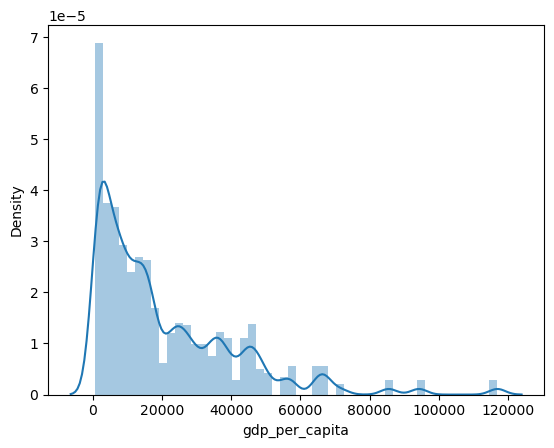

In [55]:
sns.distplot(data['gdp_per_capita'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10352\3256865026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_groupby['gdp_per_capita'])


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

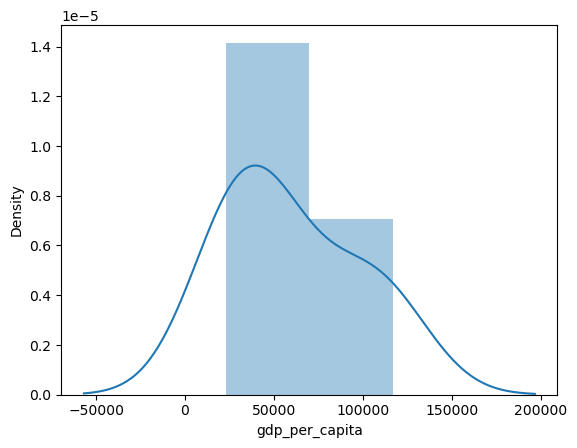

In [56]:
sns.distplot(df_groupby['gdp_per_capita'])

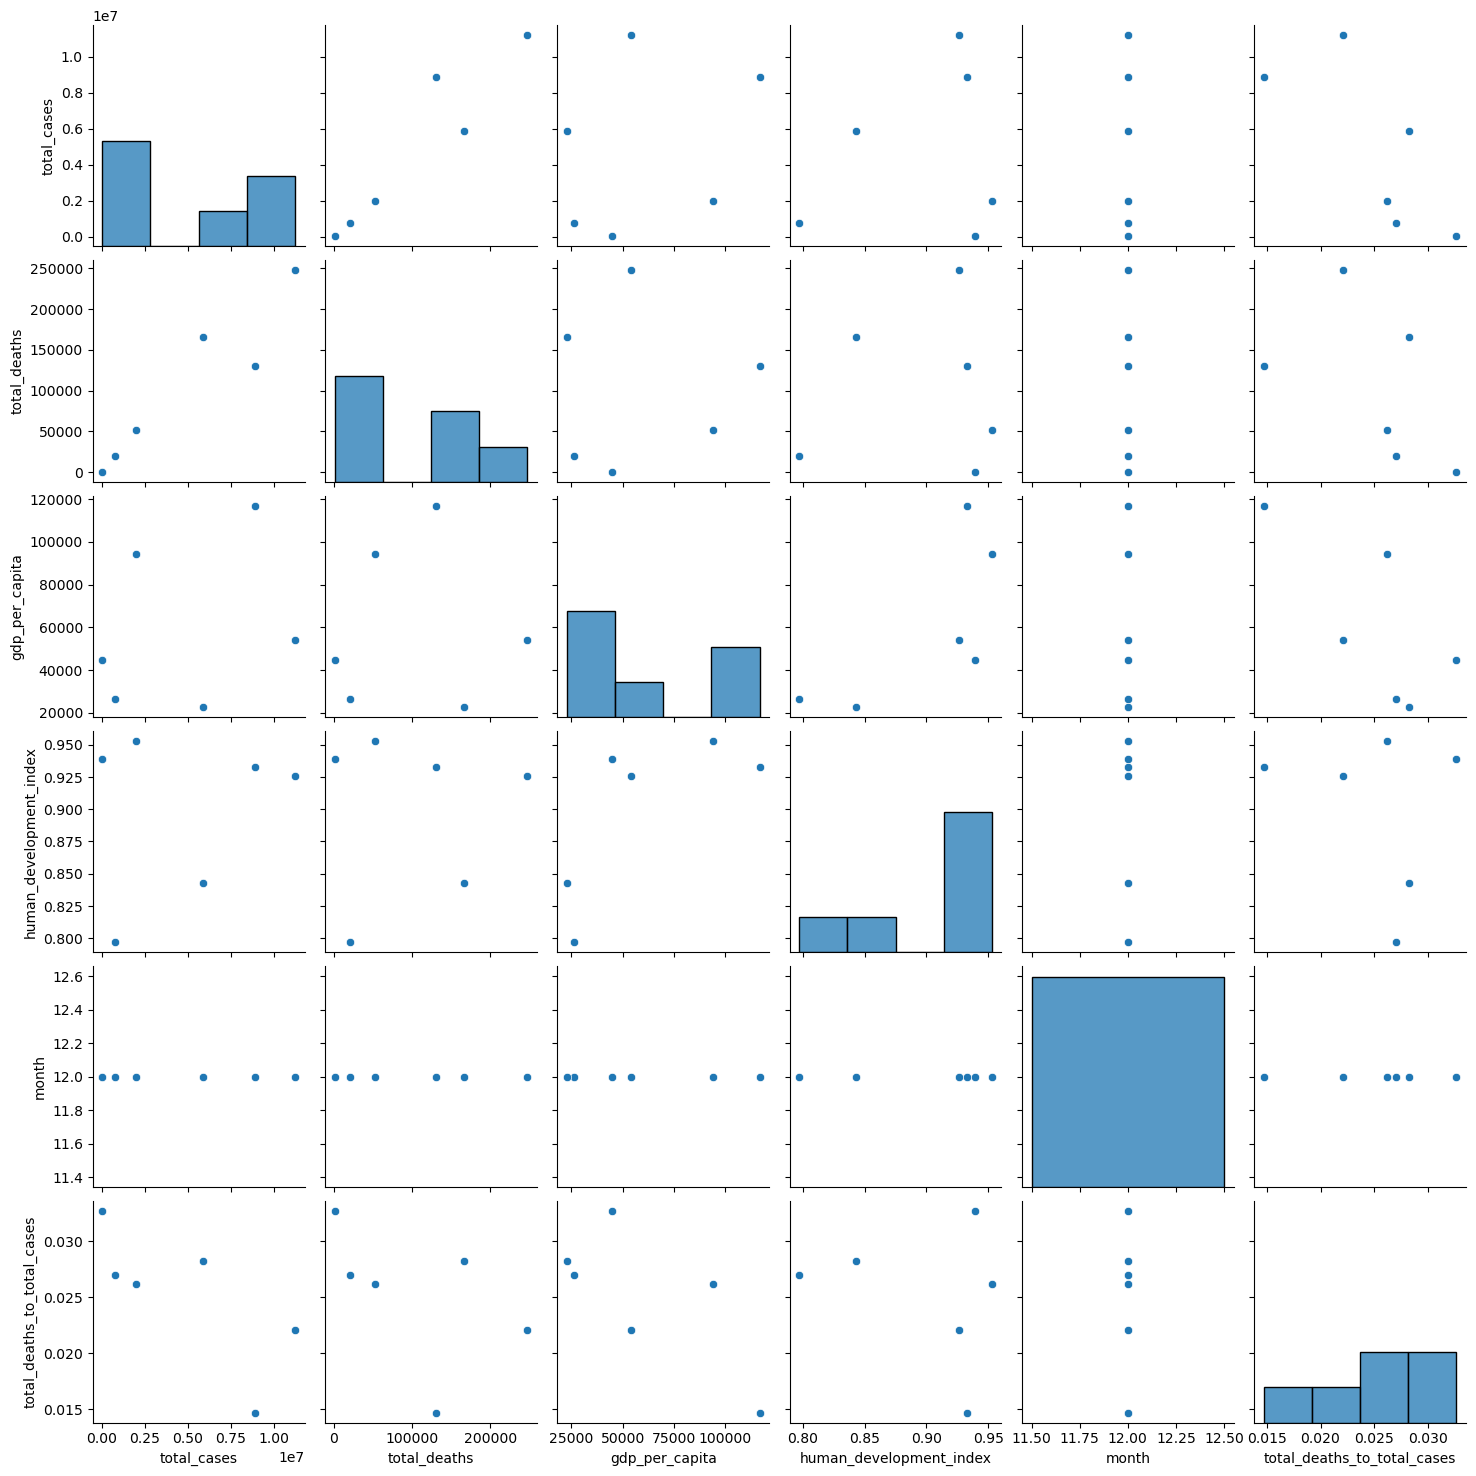

In [57]:
sns.pairplot(data=df_groupby)

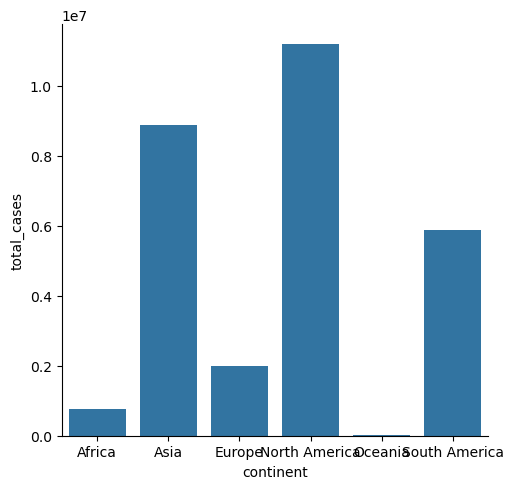

In [61]:
sns.catplot(data=df_groupby,x="continent",y="total_cases",kind="bar")

In [63]:
df_groupby.to_csv("covid_data.csv")